No configuration for shape_erosion found, parameter will be set to 0
No configuration for path_optimization found, parameter will be set to hilbert
No configuration for greedy_k found, parameter will be set to 0
No configuration for segmentation_channel found, parameter will be set to 15
No configuration for hilbert_p found, parameter will be set to 7
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for processes found, parameter will be set to 10
No configuration for join_intersecting found, parameter will be set to True
sanity check for cell set 0
cell set 0 passed sanity check
sanity check for cell set 1
cell set 1 passed sanity check
Convert label format into coordinate format
0
start removal of zero vectors
start removal of out of class cells
start center calculation
start length calculation
Conversion finished, sanity check
Check passed
Check passed
Check pas

100%|██████████| 23/23 [00:02<00:00,  8.81it/s]


Calculating polygons


100%|██████████| 23/23 [00:03<00:00,  6.33it/s]


Polygon calculation finished
Current path length: 11,024.54 units
Path optimizer defined in config: hilbert
Optimized path length: 4,364.52 units
Optimization factor: 2.5x


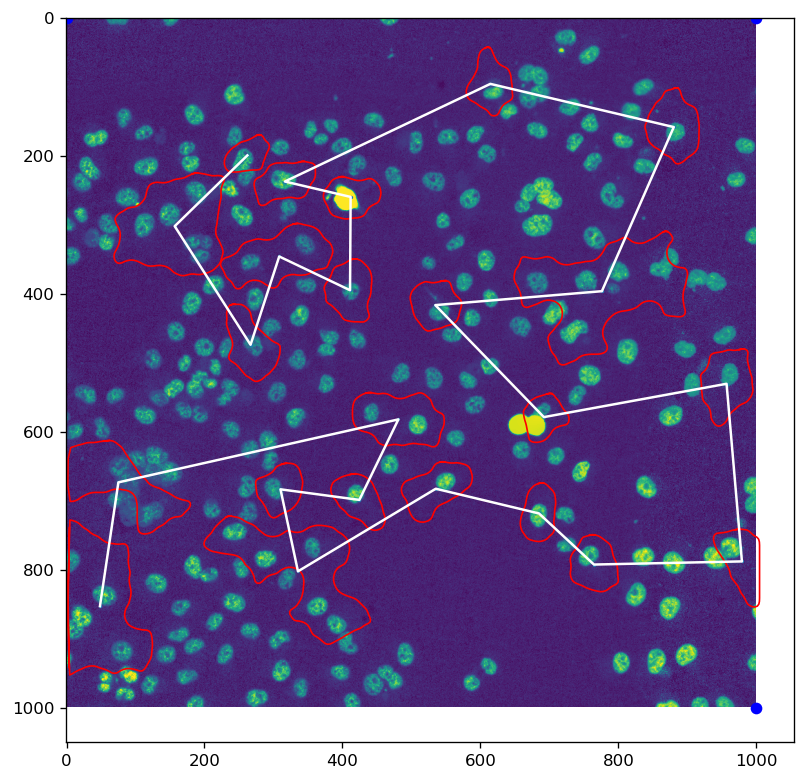

Convert label format into coordinate format
0
start removal of zero vectors
start removal of out of class cells
start center calculation
start length calculation
Conversion finished, sanity check
Check passed
Check passed
Check passed
Initializing shapes for polygon creation
Initializing shape 0
Create shapes for merged cells


100%|██████████| 22/22 [00:02<00:00,  7.81it/s]

Calculating polygons



100%|██████████| 22/22 [00:03<00:00,  5.68it/s]


Polygon calculation finished
Current path length: 8,699.55 units
Path optimizer defined in config: hilbert
Optimized path length: 4,724.25 units
Optimization factor: 1.8x


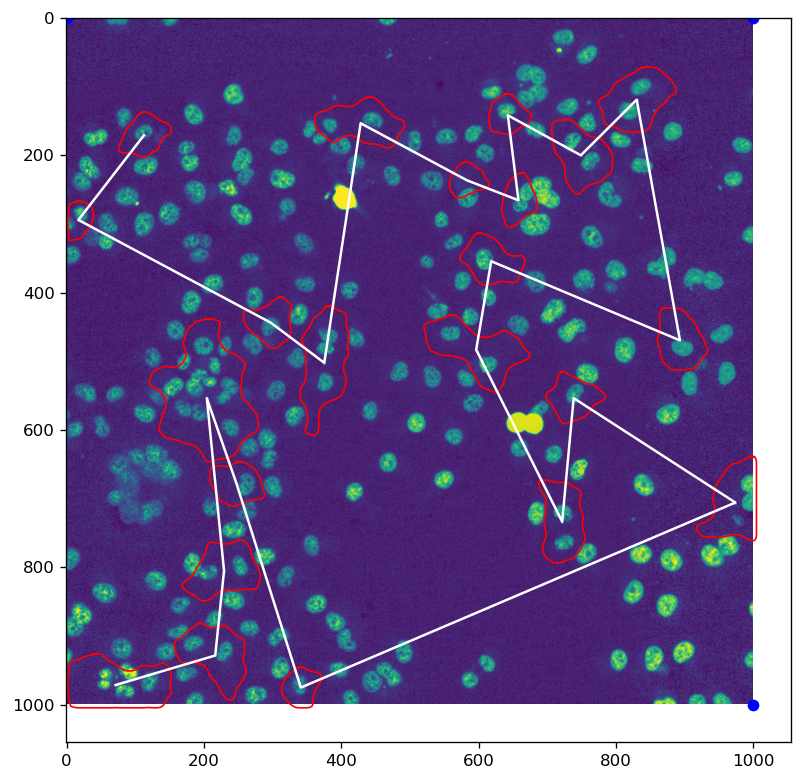

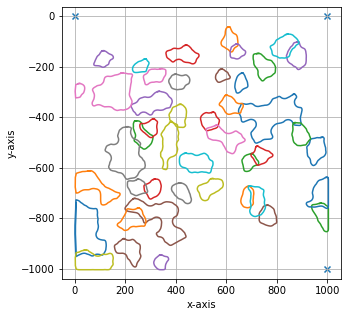

In [1]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = np.array_split(all_classes[indices],2)

cell_sets = [{"classes": list(classes_to_cut[0]), "well": "A1"},
             {"classes": list(classes_to_cut)[1], "well": "A2"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 5,
    'binary_smoothing': 20,
    'poly_compression_factor': 10,
    'convolution_smoothing':20,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = True)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)

shape_collection.plot(calibration = True, figsize = (10, 10))


In [2]:
off = np.array([10, -8])
np.max(np.array([off, [0,0]]), axis=0) 

array([10,  0])